In [1]:
%run setup.ipynb

In [2]:
%matplotlib inline

In [3]:
tbl_variants = etl.frompickle('../data/tbl_variants_phase1.pkl')
tbl_variants.head()

0|CHROM,1|POS,2|num_alleles,3|REF,4|ALT,5|AC,6|ALTIX,7|FILTER_PASS,8|NoCoverage,9|LowCoverage,10|HighCoverage,11|LowMQ,12|HighMQ0,13|RepeatDUST,14|RepeatMasker,15|RepeatTRF,16|FS,17|HRun,18|QD,19|ReadPosRankSum,20|SNPEFF_Allele,21|SNPEFF_Annotation,22|SNPEFF_HGVS_c,23|SNPEFF_HGVS_p,24|SNPEFF_Feature_ID,25|AF_AOM,26|AF_BFM,27|AF_GWA,28|AF_GNS,29|AF_BFS,30|AF_CMS,31|AF_GAS,32|AF_UGS,33|AF_KES,34|check_allele,35|exon_start,36|exon_end,37|exon,38|AGAP004707-RA,39|AGAP004707-RB,40|AGAP004707-RC,41|Davies-C1N2,42|Davies-C3N2,43|Davies-C5N2,44|Davies-C7N2,45|Davies-C8N2,46|Davies-C10N2,47|Davies-C11N2,48|Davies-C1N9,49|Davies-C8N9,50|Davies-C1N9ck,51|haps_vidx,52|dprime_L995S,53|dprime_L995F
2L,2358254,2,G,A,1,0,True,0,0,10,0,0,False,False,False,9.8672,1,17.547,-0.049988,A,missense_variant,n.97G>A,p.Asp33Asn,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.00181818181818,0.0,0.0,0.0,True,2358158,2358304,1,"('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')","('NON_SYNONYMOUS_CODING', 'D33N')",0,-1.0,-1.0
2L,2358316,2,T,G,73,0,True,0,0,15,0,0,False,False,False,2.4844,0,16.438,1.4219,G,intron_variant,n.147+12T>G,None,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.132727272727,0.0,0.0,0.0,True,None,None,None,"('INTRONIC', 'AGAP004707-PA', 12, 'AGAP004707-PA', -3691)","('INTRONIC', 'AGAP004707-PB', 12, 'AGAP004707-PB', -3691)","('INTRONIC', 'AGAP004707-PC', 12, 'AGAP004707-PC', -3691)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '2j', -1324)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '3', -3673)","('INTRONIC', '1', 12, '2j', -1324)","('INTRONIC', '1', 12, '3', -3673)",1,0.9809464508094645,-1.0
2L,2358328,2,T,C,2,0,True,0,0,14,0,0,False,False,False,2.7363,0,16.062,-0.646,C,intron_variant,n.147+24T>C,None,AGAP004707-RA,0.0,0.00724637681159,0.0108695652174,0.0,0.0,0.0,0.0,0.0,0.0,True,None,None,None,"('INTRONIC', 'AGAP004707-PA', 24, 'AGAP004707-PA', -3679)","('INTRONIC', 'AGAP004707-PB', 24, 'AGAP004707-PB', -3679)","('INTRONIC', 'AGAP004707-PC', 24, 'AGAP004707-PC', -3679)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '2j', -1312)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '3', -3661)","('INTRONIC', '1', 24, '2j', -1312)","('INTRONIC', '1', 24, '3', -3661)",2,-1.0,-0.012903225806451613
2L,2358353,2,C,T,1,0,True,0,1,15,0,0,False,False,False,1.9512,0,9.8594,1.1582,T,intron_variant,n.147+49C>T,None,AGAP004707-RA,0.0,0.0,0.0108695652174,0.0,0.0,0.0,0.0,0.0,0.0,True,None,None,None,"('INTRONIC', 'AGAP004707-PA', 49, 'AGAP004707-PA', -3654)","('INTRONIC', 'AGAP004707-PB', 49, 'AGAP004707-PB', -3654)","('INTRONIC', 'AGAP004707-PC', 49, 'AGAP004707-PC', -3654)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '2j', -1287)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '3', -3636)","('INTRONIC', '1', 49, '2j', -1287)","('INTRONIC', '1', 49, '3', -3636)",3,-1.0,-1.0
2L,2358405,2,T,A,1,0,True,0,6,14,0,0,False,False,False,20.844,1,10.859,1.1562,A,intron_variant,n.147+101T>A,None,AGAP004707-RA,0.0,0.0,0.0108695652174,0.0,0.0,0.0,0.0,0.0,0.0,True,None,None,None,"('INTRONIC', 'AGAP004707-PA', 101, 'AGAP004707-PA', -3602)","('INTRONIC', 'AGAP004707-PB', 101, 'AGAP004707-PB', -3602)","('INTRONIC', 'A

In [4]:
transcript_ids = [
    'AGAP004707-RA',
    'AGAP004707-RB',
    'AGAP004707-RC',
    'Davies-C1N2',
    'Davies-C3N2',
    'Davies-C5N2',
    'Davies-C7N2',
    'Davies-C8N2',
    'Davies-C10N2',
    'Davies-C11N2',
    'Davies-C1N9',
    'Davies-C8N9',
    'Davies-C1N9ck'
]

In [5]:
pop_ids = 'AOM BFM GWA GNS BFS CMS GAS UGS KES'.split()

In [6]:
# keep only the missense variants


def simplify_missense_effect(v):
    if v and v[0] == 'NON_SYNONYMOUS_CODING':
        return v[1]
    else:
        return ''
    
    
td_styles = {
    'FILTER_PASS': lambda v: 'background-color: red' if not v else '',
    'NoCoverage': lambda v: 'background-color: red' if v > 1 else '',
    'LowCoverage': lambda v: 'background-color: red' if v > 76 else '',
    'HighCoverage': lambda v: 'background-color: red' if v > 15 else '',
    'LowMQ': lambda v: 'background-color: red' if v > 76 else '',
    'HighMQ0': lambda v: 'background-color: red' if v > 1 else '',
    'RepeatDUST': lambda v: 'background-color: red' if v else '',
    'FS': lambda v: 'background-color: red' if v > 60 else '',
    'QD': lambda v: 'background-color: red' if v < 5 else '',
    'ReadPosRankSum': lambda v: 'background-color: red' if v < -8 else '',
    'HRun': lambda v: 'background-color: red' if v > 4 else '',
    'num_alleles': lambda v: 'background-color: orange' if v > 2 else '',
}
for p in pop_ids:
    td_styles['AF_' + p] = lambda v: 'background-color: blue' if v > .05 else ''



def tr_style(row):
    """Colour row by alternate allele count."""
    return 'background-color: green' if row['AC'] > 14 else ''


tbl_variants_missense = (
    tbl_variants
    .select(lambda row: any(row[t] and row[t][0] == 'NON_SYNONYMOUS_CODING' for t in transcript_ids))
    .convert(transcript_ids, simplify_missense_effect)

)
tbl_variants_missense.displayall(tr_style=tr_style, td_styles=td_styles)

0|CHROM,1|POS,2|num_alleles,3|REF,4|ALT,5|AC,6|ALTIX,7|FILTER_PASS,8|NoCoverage,9|LowCoverage,10|HighCoverage,11|LowMQ,12|HighMQ0,13|RepeatDUST,14|RepeatMasker,15|RepeatTRF,16|FS,17|HRun,18|QD,19|ReadPosRankSum,20|SNPEFF_Allele,21|SNPEFF_Annotation,22|SNPEFF_HGVS_c,23|SNPEFF_HGVS_p,24|SNPEFF_Feature_ID,25|AF_AOM,26|AF_BFM,27|AF_GWA,28|AF_GNS,29|AF_BFS,30|AF_CMS,31|AF_GAS,32|AF_UGS,33|AF_KES,34|check_allele,35|exon_start,36|exon_end,37|exon,38|AGAP004707-RA,39|AGAP004707-RB,40|AGAP004707-RC,41|Davies-C1N2,42|Davies-C3N2,43|Davies-C5N2,44|Davies-C7N2,45|Davies-C8N2,46|Davies-C10N2,47|Davies-C11N2,48|Davies-C1N9,49|Davies-C8N9,50|Davies-C1N9ck,51|haps_vidx,52|dprime_L995S,53|dprime_L995F
2L,2358254,2,G,A,1,0,True,0,0,10,0,0,False,False,False,9.8672,1,17.547,-0.049988,A,missense_variant,n.97G>A,p.Asp33Asn,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.00181818181818,0.0,0.0,0.0,True,2358158,2358304,1,D33N,D33N,D33N,D33N,D33N,D33N,D33N,D33N,D33N,D33N,D33N,D33N,D33N,0,-1.0,-1.0
2L,2359670,2,G,A,7,0,False,1,171,1,1,0,False,False,False,8.6641,6,14.406,-0.029007,A,intron_variant,n.147+1366G>,None,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0109090909091,0.0,0.0,0.0113636363636,True,2359640,2359672,2j,,,,,,,,E60K,,,,E60K,,None,None,None
2L,2362002,2,A,T,2,0,True,0,1,3,0,0,False,False,False,0.5459,0,12.531,-0.55322,T,splice_region_variant&intron_varia,n.148-5A>T,None,AGAP004707-RA,0.0,0.0144927536232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2361989,2362144,3,,,,D54V,D54V,D54V,D54V,D65V,D54V,D54V,D54V,D65V,D54V,140,-1.0,1.0
2L,2362019,2,G,T,2,0,True,0,0,6,0,0,False,False,False,3.9824,0,13.641,0.7749,T,missense_variant,n.160G>T,p.Gly54Cys,AGAP004707-RA,0.0,0.0144927536232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2361989,2362144,3,G54C,G54C,G54C,G60C,G60C,G60C,G60C,G71C,G60C,G60C,G60C,G71C,G60C,142,-1.0,1.0
2L,2362023,2,C,T,1,0,True,0,1,3,0,0,False,False,False,0.0,0,13.477,-1.1611,T,missense_variant,n.164C>T,p.Pro55Leu,AGAP004707-RA,0.0,0.0,0.0,0.0,0.00617283950617,0.0,0.0,0.0,0.0,True,2361989,2362144,3,P55L,P55L,P55L,P61L,P61L,P61L,P61L,P72L,P61L,P61L,P61L,P72L,P61L,143,-1.0,1.0
2L,2390168,2,A,G,2,0,True,0,2,10,0,0,False,False,False,0.56982,1,15.219,-0.026001,G,missense_variant,n.752A>G,p.Lys251Arg,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0,0.0178571428571,0.0,0.0,True,2390129,2390341,7,K251R,K251R,K251R,K257R,K214R,K257R,K257R,K268R,K257R,K257R,K257R,K268R,K257R,816,0.30454545454545456,-0.012903225806451613
2L,2390177,2,G,A,198,0,True,0,3,8,0,0,False,False,False,0.12695,1,18.625,0.83496,A,missense_variant,n.761G>A,p.Arg254Lys,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.316363636364,0.214285714286,0.0,0.0,True,2390129,2390341,7,R254K,R254K,R254K,R260K,R217K,R260K,R260K,R271K,R260K,R260K,R260K,R271K,R260K,817,-0.9640591966173362,0.9181216134858519
2L,2390311,2,G,A,1,0,True,0,0,10,0,0,False,False,False,0.0,3,14.07,-0.70996,A,missense_variant,n.895G>A,p.Glu299Lys,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.00181818181818,0.0,0.0,0.0,True,2390129,2390341,7,E299K,E299K,E299K,E305K,E262K,E305K,E305K,E316K,E305K,E305K,E305K,E316K,E305K,821,-1.0,-1.0
2L,2390448,2,G,A,6,0,True,0,0,15,0,0,False,False,False,0.71094,0,16.125,-0.65918,A,missense_variant,n.949G>A,p.Gly317Ser,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0109090909091,0.0,0.0,0.0,True,2390425,2390485,8,G317S,G317S,G317S,G323S,G280S,G323S,G323S,G334S,G323S,G323S,G323S,G334S,G323S,828,-1.0,1.0
2L,2391228,3,G,C,10,0,True,0,0,12,0,0,False,False,False,2.0352,0,14.867,-1.1777,C,missense_variant,n.1204G>C,p.Val402Leu,AGAP004707-RA,0.0,0.0724637681159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2391156,2391320,10,V402L,V402L,V402L,V408L,V365L,,V408L,V419L,V408L,V408L,V408L,V419L,V408L,838,-1.0,-0.8025806451612904


In [7]:
# select only variants above 5% frequency in one or more populations, except
# for some manual overrides

manual_overrides = [2400071]

tbl_variants_selected = (
    tbl_variants_missense
    .select(lambda row: any(row['AF_' + p] > 0.05 for p in pop_ids) or row['POS'] in manual_overrides)
)
tbl_variants_selected.displayall(tr_style=tr_style, td_styles=td_styles)

0|CHROM,1|POS,2|num_alleles,3|REF,4|ALT,5|AC,6|ALTIX,7|FILTER_PASS,8|NoCoverage,9|LowCoverage,10|HighCoverage,11|LowMQ,12|HighMQ0,13|RepeatDUST,14|RepeatMasker,15|RepeatTRF,16|FS,17|HRun,18|QD,19|ReadPosRankSum,20|SNPEFF_Allele,21|SNPEFF_Annotation,22|SNPEFF_HGVS_c,23|SNPEFF_HGVS_p,24|SNPEFF_Feature_ID,25|AF_AOM,26|AF_BFM,27|AF_GWA,28|AF_GNS,29|AF_BFS,30|AF_CMS,31|AF_GAS,32|AF_UGS,33|AF_KES,34|check_allele,35|exon_start,36|exon_end,37|exon,38|AGAP004707-RA,39|AGAP004707-RB,40|AGAP004707-RC,41|Davies-C1N2,42|Davies-C3N2,43|Davies-C5N2,44|Davies-C7N2,45|Davies-C8N2,46|Davies-C10N2,47|Davies-C11N2,48|Davies-C1N9,49|Davies-C8N9,50|Davies-C1N9ck,51|haps_vidx,52|dprime_L995S,53|dprime_L995F
2L,2390177,2,G,A,198,0,True,0,3,8,0,0,False,False,False,0.12695,1,18.625,0.83496,A,missense_variant,n.761G>A,p.Arg254Lys,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.316363636364,0.214285714286,0.0,0.0,True,2390129,2390341,7,R254K,R254K,R254K,R260K,R217K,R260K,R260K,R271K,R260K,R260K,R260K,R271K,R260K,817,-0.9640591966173362,0.9181216134858519
2L,2391228,3,G,C,10,0,True,0,0,12,0,0,False,False,False,2.0352,0,14.867,-1.1777,C,missense_variant,n.1204G>C,p.Val402Leu,AGAP004707-RA,0.0,0.0724637681159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2391156,2391320,10,V402L,V402L,V402L,V408L,V365L,,V408L,V419L,V408L,V408L,V408L,V419L,V408L,838,-1.0,-0.8025806451612904
2L,2391228,3,G,T,9,1,True,0,0,12,0,0,False,False,False,2.0352,0,14.867,-1.1777,None,None,None,None,None,0.0,0.0652173913043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2391156,2391320,10,V402L,V402L,V402L,V408L,V365L,,V408L,V419L,V408L,V408L,V408L,V419L,V408L,838,-1.0,-1.0
2L,2399997,2,G,C,38,0,True,0,1,7,0,0,False,False,False,13.359,0,15.688,0.11798,C,missense_variant,n.1396G>C,p.Asp466His,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0690909090909,0.0,0.0,0.0,True,2399898,2400173,11i+,D466H,D466H,D466H,D472H,D429H,D417H,D472H,D483H,D472H,D472H,D472H,D483H,D472H,1080,-1.0,1.0
2L,2400071,3,G,A,16,0,True,0,0,8,0,0,False,False,False,5.6875,0,16.969,1.3232,A,missense_variant,n.1470G>A,p.Met490Ile,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818181818,True,2399898,2400173,11i+,M490I,M490I,M490I,M496I,M453I,M441I,M496I,M507I,M496I,M496I,M496I,M507I,M496I,1083,-1.0,-1.0
2L,2400071,3,G,T,2,1,True,0,0,8,0,0,False,False,False,5.6875,0,16.969,1.3232,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.00363636363636,0.0,0.0,0.0,True,2399898,2400173,11i+,M490I,M490I,M490I,M496I,M453I,M441I,M496I,M507I,M496I,M496I,M496I,M507I,M496I,1083,-1.0,-1.0
2L,2416980,2,C,T,32,0,True,0,2,11,0,0,False,False,False,2.0449,0,17.703,0.37305,T,missense_variant,n.2372C>T,p.Thr791Met,AGAP004707-RA,0.0,0.0144927536232,0.0,0.129032258065,0.135802469136,0.0,0.0,0.0,0.0,True,2416794,2417071,18b+,T791M,T791M,T791M,T804M,T733M,T721M,T776M,T787M,T776M,T776M,T804M,T787M,T804M,1434,-1.0,1.0
2L,2422651,2,T,C,430,0,True,0,2,10,0,0,False,False,False,0.95117,0,27.203,-0.92822,C,missense_variant,n.2984T>C,p.Leu995Ser,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.154545454545,0.642857142857,1.0,0.761363636364,True,2422468,2422655,21,L995S,L995S,L995S,L1008S,L937S,L925S,L980S,L991S,L980S,L980S,L1008S,L991S,L1008S,1531,1.0,-1.0
2L,2422652,2,A,T,775,0,True,0,2,9,0,0,False,False,False,0.73291,3,29.047,0.19104,T,missense_variant,n.2985A>T,p.Leu995Phe,AGAP004707-RA,0.858333333333,0.847826086957,0.0,1.0,1.0,0.529090909091,0.357142857143,0.0,0.0,True,2422468,2422655,21,L995F,L995F,L995F,L1008F,L937F,L925F,L980F,L991F,L980F,L980F,L1008F,L991F,L1008F,1532,-1.0,1.0
2L,2424384,2,C,T,11,0,True,0,1,14,0,0,False,False,False,5.4141,0,14.172,-2.3242,T,missense_variant,n.3374C>T,p.Ala1125Val,AGAP004707-RA,0.0916666666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2424207,2424418,23f+,A1125V,A1125V,A1125V,A1138V,A1067V,A1045V,A1100V,A1121V,A1110V,A1110V,A1138V,A1121V,A1138V,1565,-1.0,-0.46158357771261


In [8]:
tbl_variants_selected.nrows()

22

In [ ]:
region_vgsc = SeqFeature('2L', 2358158, 2431617)
# these are the biallelics phased with shapeit2
callset_phased = phase1_ar31.callset_phased
# positions of all biallelic SNPs in the shapeit2 callset
pos_biallelic = allel.SortedIndex(callset_phased['2L/variants/POS'])

In [23]:
# extract to region
loc_vgsc_region = pos_biallelic.locate_range(region_vgsc.start, region_vgsc.end)
pos_biallelic_vgsc = pos_biallelic[loc_vgsc_region]
haps_biallelic_vgsc = allel.GenotypeArray(callset_phased['2L/calldata/genotype'][loc_vgsc_region, :765]).to_haplotypes()
pos_biallelic_vgsc

0,1,2,3,4,...,1705,1706,1707,1708,1709
2358254,2358316,2358328,2358353,2358405,...,2431417,2431487,2431518,2431527,2431542


In [24]:
haps_biallelic_vgsc

<HaplotypeArray shape=(1710, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [25]:
# these are the multiallelics phased with mvncall
callset_vgsc_phased_extras = np.load('../data/phasing_extra_phase1.mvncall.200.npz')
# positions of multiallelic SNPs in the mvncall callset
pos_extras = allel.SortedIndex(callset_vgsc_phased_extras['variants']['POS'])
pos_extras

0,1,2
2391228,2400071,2429745


In [26]:
# haplotypes at all phased extras sites
haps_extras = allel.GenotypeArray(callset_vgsc_phased_extras['calldata']['genotype']).to_haplotypes()
haps_extras

,0,1,2,3,4,...,1525,1526,1527,1528,1529
0,0,0,2,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,1,0,0,0,1,...,0,0,0,0,0


In [27]:
# combine haplotypes for bi- and multi-allelic SNPs
haps_combined = haps_biallelic_vgsc.concatenate(haps_extras)
haps_combined

<HaplotypeArray shape=(1713, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 2 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
1 0 0 0 1 ... 0 0 0 0 0

In [28]:
pos_combined = np.array(list(pos_biallelic_vgsc) + list(pos_extras))
idx_sorted = np.argsort(pos_combined)
idx_sorted

array([   0,    1,    2, ..., 1707, 1708, 1709])

In [29]:
haps_combined = haps_combined.take(idx_sorted, axis=0)
pos_combined = allel.SortedIndex(pos_combined.take(idx_sorted, axis=0))
haps_combined

<HaplotypeArray shape=(1713, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [30]:
pos_combined

0,1,2,3,4,...,1708,1709,1710,1711,1712
2358254,2358316,2358328,2358353,2358405,...,2431417,2431487,2431518,2431527,2431542


In [31]:
def lewontin_d_prime(h, i, j, a=1, b=1):
    """Compute LD between a pair of alleles.
    
    Parameters
    ----------
    h : array
        Haplotype array.
    i : int
        First variant index.
    j : int
        Second variant index.
    a : int
        First variant allele.
    b : int
        Second variant allele.
    
    Returns
    -------
    ld : float
    
    """
    
    # setup
    h = allel.HaplotypeArray(h)
    n_a = n_b = 0  # allele counts
    n_ab = 0  # haplotype counts
    n = 0  # allele number (i.e., number of calls)
    
    # iterate over haplotypes, counting alleles and haplotypes
    for k in range(h.n_haplotypes):
        
        # access alleles
        allele_ik = h[i, k]
        allele_jk = h[j, k]
        
        # only count if allele non-missing at both sites
        if allele_ik < 0 or allele_jk < 0:
            continue
            
        # accumulate
        if allele_ik == a:
            n_a += 1
        if allele_jk == b:
            n_b += 1
        if allele_ik == a and allele_jk == b:
            n_ab += 1
        n += 1
        
    log('D_prime counts:', 'i', i, 'j', j, 'a', a, 'b', b, 'n', n, 'n_a', n_a, 'n_b', n_b)
        
    # bail out if no data or either allele is absent or fixed
    if n == 0 or n_a == 0 or n_b == 0 or n == n_a or n == n_b:
        return None
    
    # N.B., compute D prime using counts rather than frequencies to avoid floating-point errors
    # N.B., preserve the sign of D prime to retain information about linkage versus repulsion
    
    # compute coefficient of linkage disequilibrium * n**2
    D_ab = (n * n_ab) - (n_a * n_b)
    
    # compute normalisation coefficient * n**2
    if D_ab >= 0:
        D_max = min(n_a * (n - n_b), (n - n_a) * n_b)
    else:
        D_max = min(n_a * n_b, (n - n_a) * (n - n_b))

    # compute D prime
    D_prime = D_ab / D_max
    
    log('D_prime', D_prime, i, j, a, b, n, n_a, n_b, D_ab, D_max)
    if np.isnan(D_prime):
        log('nan')
#        log(D_prime, i, j, a, b, n, n_a, n_b, D_ab, D_max)
        
    return D_prime


In [32]:
pos_selected = allel.SortedIndex(sorted(tbl_variants_selected.values('POS').set()))
pos_selected

0,1,2,3,4,...,15,16,17,18,19
2390177,2391228,2399997,2400071,2416980,...,2430863,2430880,2430881,2431061,2431079


In [33]:
tbl_variants_selected

0|CHROM,1|POS,2|num_alleles,3|REF,4|ALT,5|AC,6|ALTIX,7|FILTER_PASS,8|NoCoverage,9|LowCoverage,10|HighCoverage,11|LowMQ,12|HighMQ0,13|RepeatDUST,14|RepeatMasker,15|RepeatTRF,16|FS,17|HRun,18|QD,19|ReadPosRankSum,20|SNPEFF_Allele,21|SNPEFF_Annotation,22|SNPEFF_HGVS_c,23|SNPEFF_HGVS_p,24|SNPEFF_Feature_ID,25|AF_AOM,26|AF_BFM,27|AF_GWA,28|AF_GNS,29|AF_BFS,30|AF_CMS,31|AF_GAS,32|AF_UGS,33|AF_KES,34|check_allele,35|exon_start,36|exon_end,37|exon,38|AGAP004707-RA,39|AGAP004707-RB,40|AGAP004707-RC,41|Davies-C1N2,42|Davies-C3N2,43|Davies-C5N2,44|Davies-C7N2,45|Davies-C8N2,46|Davies-C10N2,47|Davies-C11N2,48|Davies-C1N9,49|Davies-C8N9,50|Davies-C1N9ck,51|haps_vidx,52|dprime_L995S,53|dprime_L995F
2L,2390177,2,G,A,198,0,True,0,3,8,0,0,False,False,False,0.12695,1,18.625,0.83496,A,missense_variant,n.761G>A,p.Arg254Lys,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.316363636364,0.214285714286,0.0,0.0,True,2390129,2390341,7,R254K,R254K,R254K,R260K,R217K,R260K,R260K,R271K,R260K,R260K,R260K,R271K,R260K,817,-0.9640591966173362,0.9181216134858519
2L,2391228,3,G,C,10,0,True,0,0,12,0,0,False,False,False,2.0352,0,14.867,-1.1777,C,missense_variant,n.1204G>C,p.Val402Leu,AGAP004707-RA,0.0,0.0724637681159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2391156,2391320,10,V402L,V402L,V402L,V408L,V365L,,V408L,V419L,V408L,V408L,V408L,V419L,V408L,838,-1.0,-0.8025806451612904
2L,2391228,3,G,T,9,1,True,0,0,12,0,0,False,False,False,2.0352,0,14.867,-1.1777,None,None,None,None,None,0.0,0.0652173913043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2391156,2391320,10,V402L,V402L,V402L,V408L,V365L,,V408L,V419L,V408L,V408L,V408L,V419L,V408L,838,-1.0,-1.0
2L,2399997,2,G,C,38,0,True,0,1,7,0,0,False,False,False,13.359,0,15.688,0.11798,C,missense_variant,n.1396G>C,p.Asp466His,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0690909090909,0.0,0.0,0.0,True,2399898,2400173,11i+,D466H,D466H,D466H,D472H,D429H,D417H,D472H,D483H,D472H,D472H,D472H,D483H,D472H,1080,-1.0,1.0
2L,2400071,3,G,A,16,0,True,0,0,8,0,0,False,False,False,5.6875,0,16.969,1.3232,A,missense_variant,n.1470G>A,p.Met490Ile,AGAP004707-RA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818181818,True,2399898,2400173,11i+,M490I,M490I,M490I,M496I,M453I,M441I,M496I,M507I,M496I,M496I,M496I,M507I,M496I,1083,-1.0,-1.0


In [34]:
pos_selected.shape

(20,)

In [35]:
# be careful about multiallelics here?
loc_combined_selected = pos_combined.locate_keys(pos_selected)
np.count_nonzero(loc_combined_selected)

20

In [36]:
haps_selected = haps_combined[loc_combined_selected]
haps_selected

<HaplotypeArray shape=(20, 1530) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 2 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 1 0 1
0 0 0 1 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [37]:
ac = haps_selected.count_alleles()
ac.displayall()

,0,1,2
0,1332,198,0
1,1511,10,9
2,1492,38,0
3,1512,16,2
4,1498,32,0
5,1100,430,0
6,755,775,0
7,1519,11,0
8,1525,5,0
9,1511,19,0


In [38]:
tbl_variants_selected.records()[0].CHROM

'2L'

In [40]:
np.bincount(haps_selected[1])

array([1511,   10,    9])

In [41]:
recs = list(tbl_variants_selected.records())
n = len(recs)
ld = np.zeros((n, n), dtype='f8')
for i in range(n):
    i_pos = recs[i].POS
    i_allele = recs[i].ALTIX + 1
    i_vidx = pos_selected.locate_key(i_pos)
    log('row', i, i_vidx, i_pos, i_allele)
    for j in range(i+1, n):
        j_pos = recs[j].POS
        j_allele = recs[j].ALTIX + 1
        j_vidx = pos_selected.locate_key(j_pos)
        log('col', j, j_vidx, j_pos, j_allele)
        v = lewontin_d_prime(haps_selected, i_vidx, j_vidx, i_allele, j_allele)
        log('D_prime', v)
        ld[i, j] = v
        ld[j, i] = v
        

row 0 0 2390177 1
col 1 1 2391228 1
D_prime counts: i 0 j 1 a 1 b 1 n 1530 n_a 198 n_b 10
D_prime -1.0 0 1 1 1 1530 198 10 -1980 1980
D_prime -1.0
col 2 1 2391228 2
D_prime counts: i 0 j 1 a 1 b 2 n 1530 n_a 198 n_b 9
D_prime -1.0 0 1 1 2 1530 198 9 -1782 1782
D_prime -1.0
col 3 2 2399997 1
D_prime counts: i 0 j 2 a 1 b 1 n 1530 n_a 198 n_b 38
D_prime -1.0 0 2 1 1 1530 198 38 -7524 7524
D_prime -1.0
col 4 3 2400071 1
D_prime counts: i 0 j 3 a 1 b 1 n 1530 n_a 198 n_b 16
D_prime -1.0 0 3 1 1 1530 198 16 -3168 3168
D_prime -1.0
col 5 3 2400071 2
D_prime counts: i 0 j 3 a 1 b 2 n 1530 n_a 198 n_b 2
D_prime -1.0 0 3 1 2 1530 198 2 -396 396
D_prime -1.0
col 6 4 2416980 1
D_prime counts: i 0 j 4 a 1 b 1 n 1530 n_a 198 n_b 32
D_prime -1.0 0 4 1 1 1530 198 32 -6336 6336
D_prime -1.0
col 7 5 2422651 1
D_prime counts: i 0 j 5 a 1 b 1 n 1530 n_a 198 n_b 430
D_prime -0.9640591966173362 0 5 1 1 1530 198 430 -82080 85140
D_prime -0.9640591966173362
col 8 6 2422652 1
D_prime counts: i 0 j 6 a 1 b 1 n

D_prime -1.0 2 4 1 1 1530 38 32 -1216 1216
D_prime -1.0
col 7 5 2422651 1
D_prime counts: i 2 j 5 a 1 b 1 n 1530 n_a 38 n_b 430
D_prime -1.0 2 5 1 1 1530 38 430 -16340 16340
D_prime -1.0
col 8 6 2422652 1
D_prime counts: i 2 j 6 a 1 b 1 n 1530 n_a 38 n_b 775
D_prime 1.0 2 6 1 1 1530 38 775 28690 28690
D_prime 1.0
col 9 7 2424384 1
D_prime counts: i 2 j 7 a 1 b 1 n 1530 n_a 38 n_b 11
D_prime -1.0 2 7 1 1 1530 38 11 -418 418
D_prime -1.0
col 10 8 2425077 1
D_prime counts: i 2 j 8 a 1 b 1 n 1530 n_a 38 n_b 5
D_prime -1.0 2 8 1 1 1530 38 5 -190 190
D_prime -1.0
col 11 9 2429617 1
D_prime counts: i 2 j 9 a 1 b 1 n 1530 n_a 38 n_b 19
D_prime -1.0 2 9 1 1 1530 38 19 -722 722
D_prime -1.0
col 12 10 2429745 1
D_prime counts: i 2 j 10 a 1 b 1 n 1530 n_a 38 n_b 110
D_prime -1.0 2 10 1 1 1530 38 110 -4180 4180
D_prime -1.0
col 13 11 2429897 1
D_prime counts: i 2 j 11 a 1 b 1 n 1530 n_a 38 n_b 11
D_prime -1.0 2 11 1 1 1530 38 11 -418 418
D_prime -1.0
col 14 12 2429915 1
D_prime counts: i 2 j 12 a 1

D_prime -1.0 5 6 1 1 1530 430 775 -333250 333250
D_prime -1.0
col 9 7 2424384 1
D_prime counts: i 5 j 7 a 1 b 1 n 1530 n_a 430 n_b 11
D_prime -1.0 5 7 1 1 1530 430 11 -4730 4730
D_prime -1.0
col 10 8 2425077 1
D_prime counts: i 5 j 8 a 1 b 1 n 1530 n_a 430 n_b 5
D_prime -1.0 5 8 1 1 1530 430 5 -2150 2150
D_prime -1.0
col 11 9 2429617 1
D_prime counts: i 5 j 9 a 1 b 1 n 1530 n_a 430 n_b 19
D_prime -1.0 5 9 1 1 1530 430 19 -8170 8170
D_prime -1.0
col 12 10 2429745 1
D_prime counts: i 5 j 10 a 1 b 1 n 1530 n_a 430 n_b 110
D_prime -1.0 5 10 1 1 1530 430 110 -47300 47300
D_prime -1.0
col 13 11 2429897 1
D_prime counts: i 5 j 11 a 1 b 1 n 1530 n_a 430 n_b 11
D_prime -1.0 5 11 1 1 1530 430 11 -4730 4730
D_prime -1.0
col 14 12 2429915 1
D_prime counts: i 5 j 12 a 1 b 1 n 1530 n_a 430 n_b 7
D_prime -1.0 5 12 1 1 1530 430 7 -3010 3010
D_prime -1.0
col 15 13 2430424 1
D_prime counts: i 5 j 13 a 1 b 1 n 1530 n_a 430 n_b 28
D_prime -1.0 5 13 1 1 1530 430 28 -12040 12040
D_prime -1.0
col 16 14 24308

D_prime counts: i 10 j 13 a 1 b 1 n 1530 n_a 110 n_b 28
D_prime -1.0 10 13 1 1 1530 110 28 -3080 3080
D_prime -1.0
col 16 14 2430817 1
D_prime counts: i 10 j 14 a 1 b 1 n 1530 n_a 110 n_b 13
D_prime -1.0 10 14 1 1 1530 110 13 -1430 1430
D_prime -1.0
col 17 15 2430863 1
D_prime counts: i 10 j 15 a 1 b 1 n 1530 n_a 110 n_b 52
D_prime -1.0 10 15 1 1 1530 110 52 -5720 5720
D_prime -1.0
col 18 16 2430880 1
D_prime counts: i 10 j 16 a 1 b 1 n 1530 n_a 110 n_b 29
D_prime -1.0 10 16 1 1 1530 110 29 -3190 3190
D_prime -1.0
col 19 17 2430881 1
D_prime counts: i 10 j 17 a 1 b 1 n 1530 n_a 110 n_b 80
D_prime -1.0 10 17 1 1 1530 110 80 -8800 8800
D_prime -1.0
col 20 18 2431061 1
D_prime counts: i 10 j 18 a 1 b 1 n 1530 n_a 110 n_b 16
D_prime -1.0 10 18 1 1 1530 110 16 -1760 1760
D_prime -1.0
col 21 19 2431079 1
D_prime counts: i 10 j 19 a 1 b 1 n 1530 n_a 110 n_b 44
D_prime -1.0 10 19 1 1 1530 110 44 -4840 4840
D_prime -1.0
row 13 11 2429897 1
col 14 12 2429915 1
D_prime counts: i 11 j 12 a 1 b 1 n

In [42]:
ld[0]

array([ 0.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.9640592 ,  0.91812161, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        ])

In [43]:
np.isnan(ld[0, 2])

False

In [85]:
s = '44'

In [87]:
s.ljust(3)

'44 '

In [102]:
plt.colorbar?

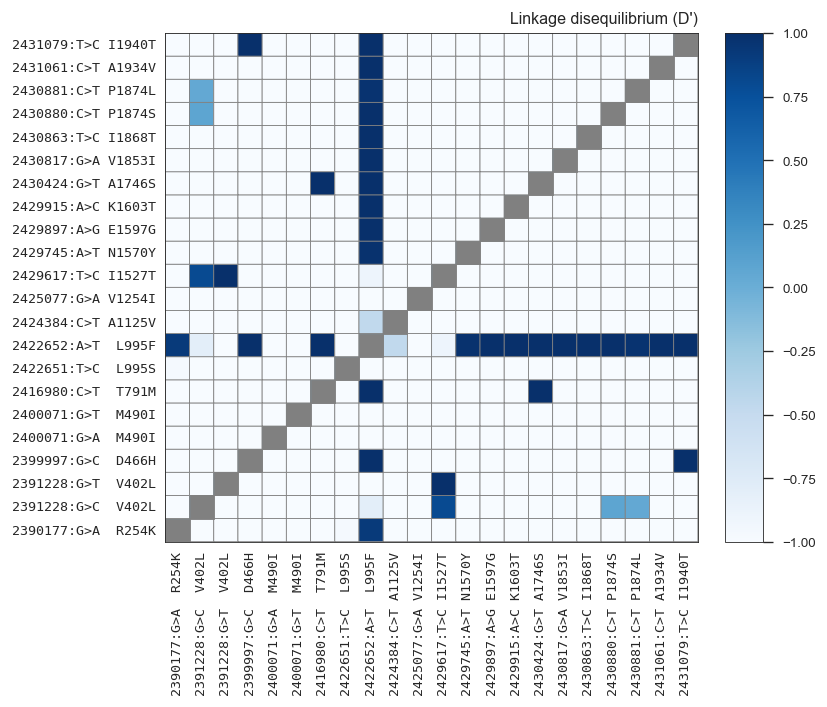

In [128]:
fig = plt.figure(figsize=(7, 6), dpi=120)

gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[7, .5])

# sns.despine(ax=ax, offset=5)
#sns.heatmap(ld, vmin=-1, vmax=1, center=0, square=True, ax=ax, cmap='Blues', cbar_kws=dict(ticks=[-1, -.5, 0, .5, 1]))

ax = fig.add_subplot(gs[0])
im = ax.pcolormesh(ld, vmin=-1, vmax=1, cmap='Blues', shading='flat', edgecolors='gray', linewidths=.5, antialiased=True)

labels = ['%s:%s>%s %s' % (rec.POS, rec.REF, rec.ALT, rec['AGAP004707-RA'].rjust(6))
          for rec in tbl_variants_selected.records()]
# ax.invert_yaxis()
ticks = np.arange(ld.shape[0]) + .5
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels, rotation=90, ha='center', va='top', fontdict=dict(family='monospace'))
ax.set_yticklabels(labels, rotation=0, va='center', ha='right', fontdict=dict(family='monospace'));
ax.set_xlim(0, ld.shape[0])
ax.set_ylim(0, ld.shape[0])
ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)
for i in range(ld.shape[0] + 1):
    ax.add_patch(plt.Rectangle((i-1, i-1), 1, 1, color='gray'))
ax.set_title("Linkage disequilibrium (D')", loc='right')

cax = fig.add_subplot(gs[1])
fig.colorbar(im, cax=cax)

fig.tight_layout()
fig.savefig('../artwork/fig_ld.png', dpi=300, bbox_inches='tight');